# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('/Users/lau_pang/Desktop/Forage/ANZ/ANZ_synthesised_transaction_dataset.xlsx')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

# Exploratory Data Analysis

## categorical variables

- status
- card_present_flag
- account
- currency
- txn_description
- merchant_id
- firstname
- gender
- merchant_suburb
- merchant_state
- extraction
- transaction_id 
- country
- customer_id
- movement

### Status

In [4]:
df['status'].value_counts(dropna = False)

authorized    7717
posted        4326
Name: status, dtype: int64

### card_present_flag

In [5]:
df['card_present_flag'].value_counts(dropna = False)

1.0    6194
NaN    4326
0.0    1523
Name: card_present_flag, dtype: int64

### Account

In [6]:
df['account'].value_counts(dropna = False)

ACC-1598451071    578
ACC-1222300524    303
ACC-182446574     292
ACC-4258502723    260
ACC-1037050564    259
                 ... 
ACC-1998563091     40
ACC-3881031190     37
ACC-721712940      34
ACC-4059612845     31
ACC-1217063613     25
Name: account, Length: 100, dtype: int64

### Currency

In [7]:
df['currency'].value_counts(dropna = False)

AUD    12043
Name: currency, dtype: int64

### txn_description

In [8]:
df['txn_description'].value_counts(dropna = False)

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

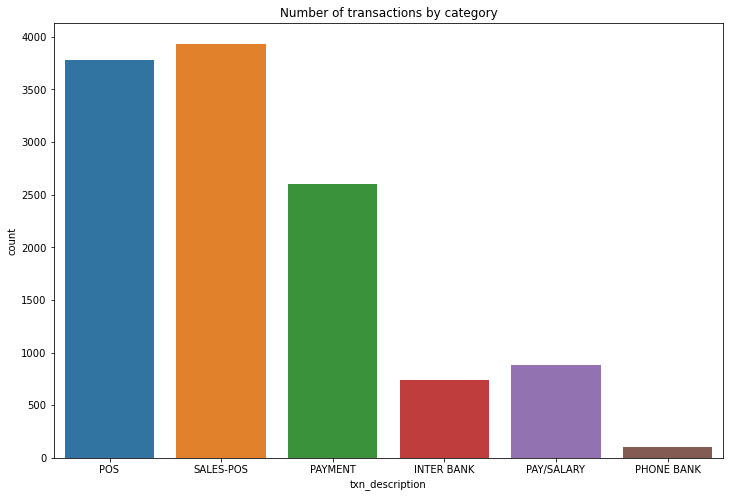

In [9]:
plt.figure(figsize = (12, 8))
sns.countplot(x = df['txn_description'])
plt.title('Number of transactions by category');

In [10]:
df[['txn_description', 'amount']].groupby('txn_description', as_index = False).mean().sort_values(by = 'amount', ascending = False)

,txn_description,amount
1,PAY/SALARY,1898.728029
3,PHONE BANK,106.099010
0,INTER BANK,86.699461
2,PAYMENT,77.613077
4,POS,40.407412
5,SALES-POS,39.909789


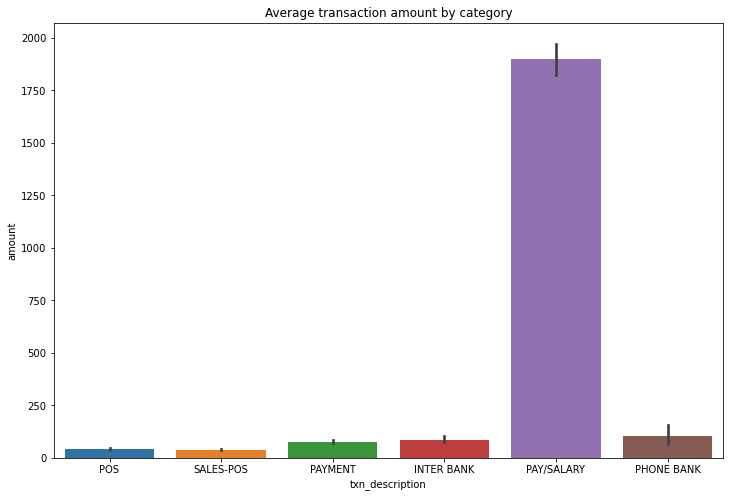

In [11]:
plt.figure(figsize= (12, 8))
sns.barplot(x = 'txn_description', y = 'amount', data = df)
plt.title('Average transaction amount by category');

### merchant_id

In [12]:
df['merchant_id'].value_counts(dropna = False)

NaN                                     4326
106e1272-44ab-4dcb-a438-dd98e0071e51      14
6c84c219-96ea-4c6f-9de5-0a28bcaec62f      12
e28c426d-cbef-4e2d-aa06-1ba0b6b1902f      11
aef30de1-c67e-4ab7-8577-2931a4bf3c7e      10
                                        ... 
5c011d61-fbbe-437f-9ffa-3d9910cd2c7a       1
9eff6ea8-061d-4e88-93a5-6711962d80ed       1
7747bd2b-e29e-486f-b6aa-ad20ec5f6971       1
a851a118-cfad-4232-8dec-f528125fc2a1       1
e5975ab4-08f7-4725-a369-24cc0e35ed6e       1
Name: merchant_id, Length: 5726, dtype: int64

### Firstname

In [13]:
df['first_name'].value_counts(dropna = False)

Michael      746
Diana        578
Jessica      408
Joseph       391
Jeffrey      388
            ... 
Cindy         51
Elizabeth     44
David         40
Andrew        34
Jonathan      31
Name: first_name, Length: 80, dtype: int64

### Gender

In [14]:
df['gender'].value_counts(dropna = False)

M    6285
F    5758
Name: gender, dtype: int64

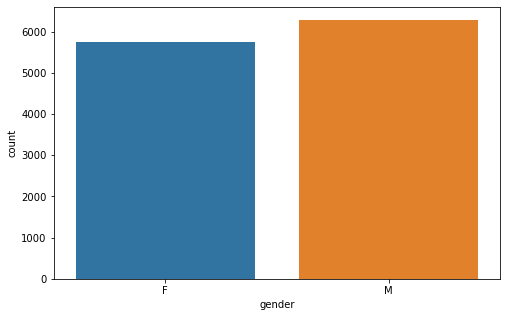

In [15]:
plt.figure(figsize = (8, 5))
sns.countplot(x = 'gender', data = df);

In [16]:
df[['gender', 'amount']].groupby('gender', as_index = False).mean().sort_values(by = 'amount', ascending = False)

,gender,amount
1,M,205.721809
0,F,168.517303


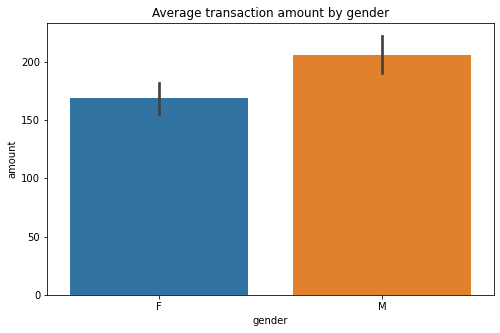

In [17]:
plt.figure(figsize=(8, 5))
sns.barplot(x = 'gender', y = 'amount', data = df)
plt.title('Average transaction amount by gender');

### merchant_subsurb

In [18]:
df['merchant_suburb'].value_counts(dropna = False)

NaN                  4326
Melbourne             255
Sydney                233
Southport              82
Brisbane City          79
                     ... 
Cowell                  1
Tweed Heads South       1
Ballandean              1
Sydenham                1
Kings Park              1
Name: merchant_suburb, Length: 1610, dtype: int64

### merchant_state

In [19]:
df['merchant_state'].value_counts(dropna = False)

NaN    4326
NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

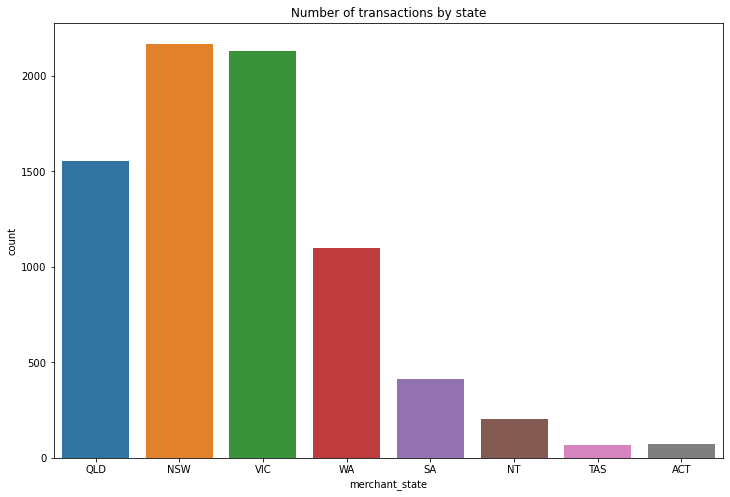

In [20]:
plt.figure(figsize = (12, 8))
sns.countplot(x = 'merchant_state', data = df)
plt.title('Number of transactions by state');

In [21]:
df[['merchant_state', 'amount']].groupby('merchant_state', as_index= False).mean().sort_values(by = 'amount', ascending = False)

,merchant_state,amount
0,ACT,66.803836
1,NSW,47.036316
2,NT,44.726293
6,VIC,41.099953
4,SA,40.425470
3,QLD,34.372397
7,WA,30.901873
5,TAS,28.866618


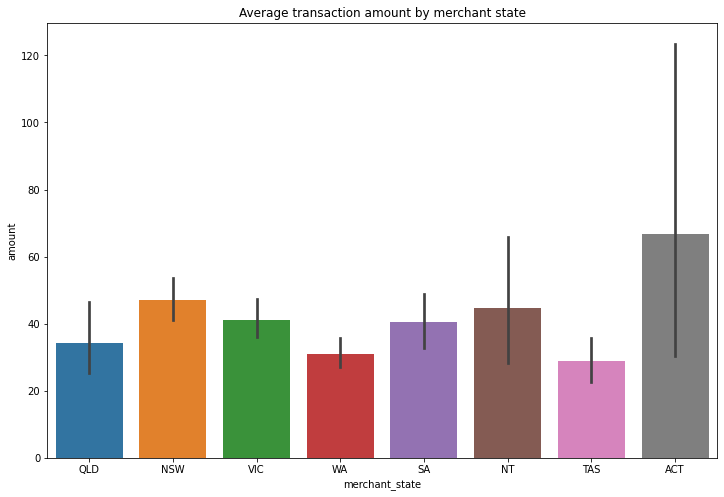

In [22]:
plt.figure(figsize= (12, 8))
sns.barplot(x = 'merchant_state', y = 'amount', data = df)
plt.title('Average transaction amount by merchant state');

### Extraction

In [23]:
df[['date', 'extraction']].head()

,date,extraction
0,2018-08-01,2018-08-01T01:01:15.000+0000
1,2018-08-01,2018-08-01T01:13:45.000+0000
2,2018-08-01,2018-08-01T01:26:15.000+0000
3,2018-08-01,2018-08-01T01:38:45.000+0000
4,2018-08-01,2018-08-01T01:51:15.000+0000


### transaction_id

In [24]:
df['transaction_id'].head()

0    a623070bfead4541a6b0fff8a09e706c
1    13270a2a902145da9db4c951e04b51b9
2    feb79e7ecd7048a5a36ec889d1a94270
3    2698170da3704fd981b15e64a006079e
4    329adf79878c4cf0aeb4188b4691c266
Name: transaction_id, dtype: object

### Country

In [25]:
df['country'].value_counts(dropna = False)

Australia    12043
Name: country, dtype: int64

### Customer_id

In [26]:
df['customer_id'].head()

0    CUS-2487424745
1    CUS-2487424745
2    CUS-2142601169
3    CUS-1614226872
4    CUS-2487424745
Name: customer_id, dtype: object

### Movement

In [27]:
df['movement'].value_counts(dropna = False)

debit     11160
credit      883
Name: movement, dtype: int64

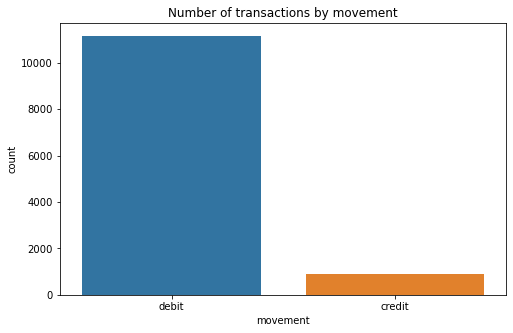

In [28]:
plt.figure(figsize = (8, 5))
sns.countplot(x = 'movement', data = df)
plt.title('Number of transactions by movement');

In [29]:
df[['movement', 'amount']].groupby('movement', as_index=False).mean().sort_values(by = 'amount', ascending = False)

,movement,amount
0,credit,1898.728029
1,debit,52.572343


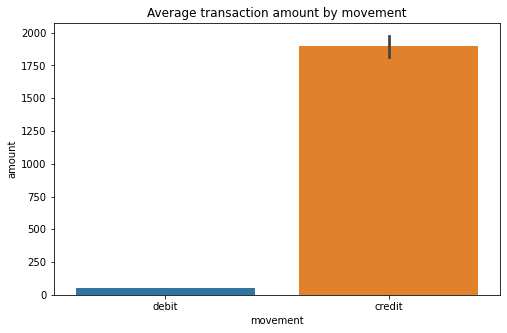

In [30]:
plt.figure(figsize=(8, 5))
sns.barplot(x = 'movement', y = 'amount', data = df)
plt.title('Average transaction amount by movement');

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

## Numerical variables

- balance
- age
- amount

### Balance

<Figure size 576x360 with 0 Axes>

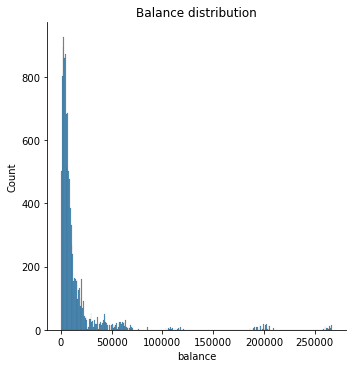

In [32]:
plt.figure(figsize=(8, 5))
sns.displot(x = 'balance', data = df)
plt.title('Balance distribution');

<AxesSubplot:xlabel='balance'>

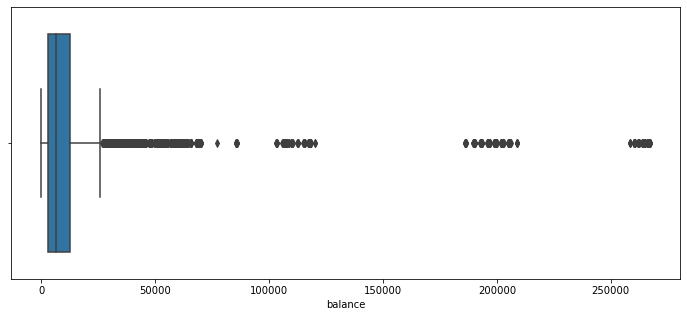

In [33]:
plt.figure(figsize=(12, 5))
sns.boxplot(x = 'balance', data = df)

### Age

<Figure size 576x360 with 0 Axes>

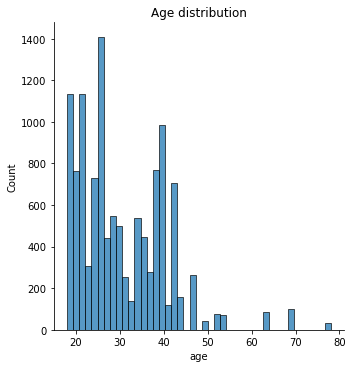

In [34]:
plt.figure(figsize=(8, 5))
sns.displot(df['age'])
plt.title('Age distribution');

### Amount

<Figure size 576x360 with 0 Axes>

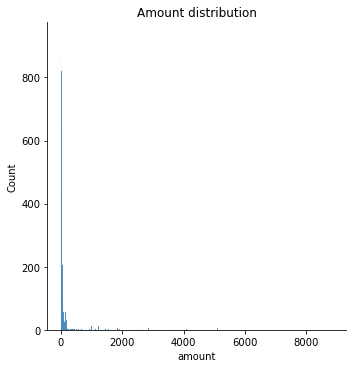

In [35]:
plt.figure(figsize=(8, 5))
sns.displot(x = 'amount', data = df)
plt.title('Amount distribution');

# Feature Engineering

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

## Drop unwanted columns

In [37]:
df.drop(columns = ['currency', 'country'], inplace = True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   long_lat           12043 non-null  object        
 5   txn_description    12043 non-null  object        
 6   merchant_id        7717 non-null   object        
 7   merchant_code      883 non-null    float64       
 8   first_name         12043 non-null  object        
 9   balance            12043 non-null  float64       
 10  date               12043 non-null  datetime64[ns]
 11  gender             12043 non-null  object        
 12  age                12043 non-null  int64         
 13  merchant_suburb    7717 non-null   object        
 14  mercha

## Deal with missing values

In [39]:
pd.DataFrame(df.isnull().sum().sort_values(ascending = False).head(7))

,0
merchant_code,11160
bpay_biller_code,11158
merchant_suburb,4326
merchant_long_lat,4326
merchant_id,4326
card_present_flag,4326
merchant_state,4326


In [40]:
df.drop(columns = ['merchant_code', 'bpay_biller_code'], inplace = True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   account            12043 non-null  object        
 3   long_lat           12043 non-null  object        
 4   txn_description    12043 non-null  object        
 5   merchant_id        7717 non-null   object        
 6   first_name         12043 non-null  object        
 7   balance            12043 non-null  float64       
 8   date               12043 non-null  datetime64[ns]
 9   gender             12043 non-null  object        
 10  age                12043 non-null  int64         
 11  merchant_suburb    7717 non-null   object        
 12  merchant_state     7717 non-null   object        
 13  extraction         12043 non-null  object        
 14  amount

## Create features for months, dayofweek, and hours

In [42]:
daily_amount = pd.DataFrame(df.groupby('date')['amount'].sum())
daily_amount.head()

,amount
date,
2018-08-01,29867.94
2018-08-02,21786.32
2018-08-03,38096.58
2018-08-04,6296.05
2018-08-05,4426.50


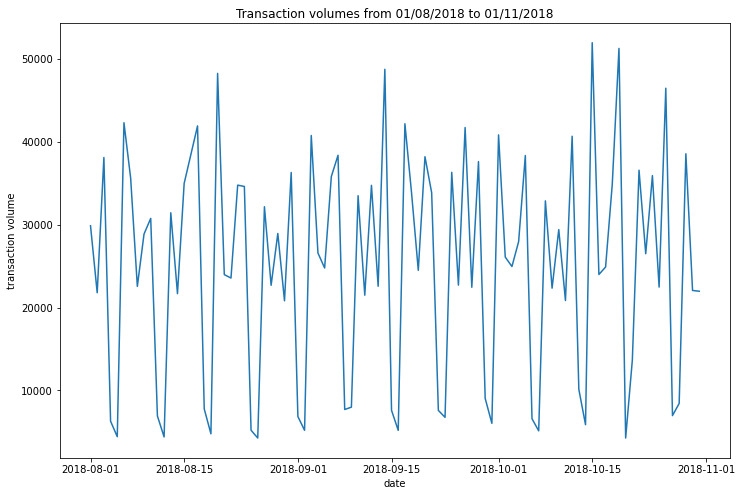

In [43]:
plt.figure(figsize=(12, 8))
plt.plot(daily_amount.amount)
plt.title('Transaction volumes from 01/08/2018 to 01/11/2018')
plt.xlabel('date')
plt.ylabel('transaction volume')
plt.show()

### create month and dayofweek features

In [44]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['dayofweek'] = pd.DatetimeIndex(df['date']).dayofweek
df[['date', 'month', 'dayofweek']].head()

,date,month,dayofweek
0,2018-08-01,8,2
1,2018-08-01,8,2
2,2018-08-01,8,2
3,2018-08-01,8,2
4,2018-08-01,8,2


### create hour feature

In [45]:
df['extraction'] = [timestamp.split('T')[1].split('.')[0] for timestamp in df['extraction']]
df['extraction'].head()

0    01:01:15
1    01:13:45
2    01:26:15
3    01:38:45
4    01:51:15
Name: extraction, dtype: object

In [46]:
df['hour'] = [timestamp.split(':')[0] for timestamp in df['extraction']]
df[['extraction', 'hour']].head()

,extraction,hour
0,01:01:15,01
1,01:13:45,01
2,01:26:15,01
3,01:38:45,01
4,01:51:15,01


# Deep Dive

In [47]:
df.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,month,dayofweek,hour
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,QLD,01:01:15,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,8,2,01
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,NSW,01:13:45,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,8,2,01
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,NSW,01:26:15,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,8,2,01
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,QLD,01:38:45,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,8,2,01
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,QLD,01:51:15,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,8,2,01


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   account            12043 non-null  object        
 3   long_lat           12043 non-null  object        
 4   txn_description    12043 non-null  object        
 5   merchant_id        7717 non-null   object        
 6   first_name         12043 non-null  object        
 7   balance            12043 non-null  float64       
 8   date               12043 non-null  datetime64[ns]
 9   gender             12043 non-null  object        
 10  age                12043 non-null  int64         
 11  merchant_suburb    7717 non-null   object        
 12  merchant_state     7717 non-null   object        
 13  extraction         12043 non-null  object        
 14  amount

## Purchase amount and overall amount

In [49]:
purchase_amount = df.loc[(df.txn_description == 'POS')| (df.txn_description == 'SALES-POS'), 'amount']
purchase_amount.head()

0    16.25
1    14.19
2     6.42
3    40.90
4     3.25
Name: amount, dtype: float64

<Figure size 576x360 with 0 Axes>

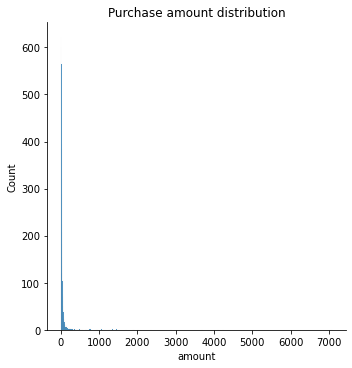

In [50]:
plt.figure(figsize=(8, 5))
sns.displot(purchase_amount)
plt.title('Purchase amount distribution');

In [51]:
purchase_amount.describe()

count    7717.000000
mean       40.153732
std       149.833070
min         0.100000
25%        12.080000
50%        19.700000
75%        33.910000
max      7081.090000
Name: amount, dtype: float64

<Figure size 576x360 with 0 Axes>

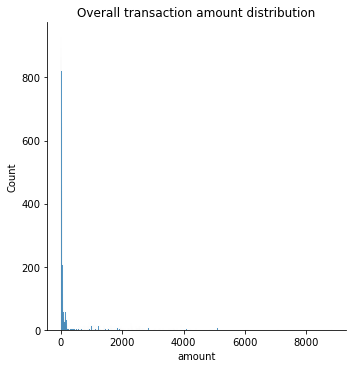

In [52]:
plt.figure(figsize=(8, 5))
sns.displot(df['amount'])
plt.title('Overall transaction amount distribution');

In [53]:
df['amount'].describe()

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

## Transaction volume over time

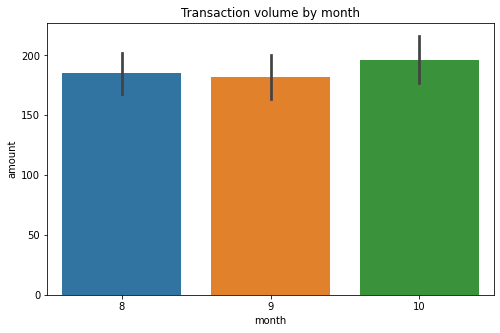

In [54]:
# How many transactions do customers make each month, on average?

plt.figure(figsize=(8, 5))
sns.barplot(x = 'month', y = 'amount', data = df)
plt.title('Transaction volume by month');

In [55]:
# How many transactions do customers make each day of week, on average?

average_daily_volume = pd.DataFrame(df.groupby('dayofweek').amount.mean())
average_daily_volume

,amount
dayofweek,
0,373.221000
1,221.576456
2,195.215570
3,184.010422
4,249.353517
5,54.419286
6,53.015845


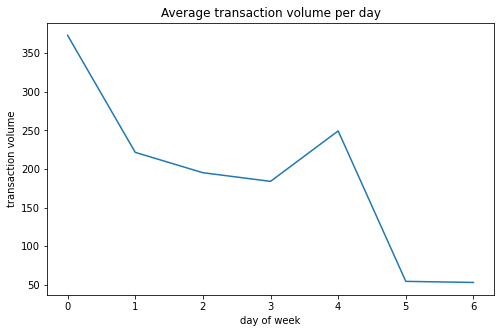

In [56]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(average_daily_volume.index, average_daily_volume.amount)
plt.title('Average transaction volume per day')
plt.xlabel('day of week')
plt.ylabel('transaction volume');

In [57]:
# How many transactions do customers make each hour, on average?

average_hourly_volume = pd.DataFrame(df.groupby('hour')['amount'].mean())
average_hourly_volume.head()

,amount
hour,
00,28.274907
01,48.716402
02,75.269764
03,84.725918
04,61.301845


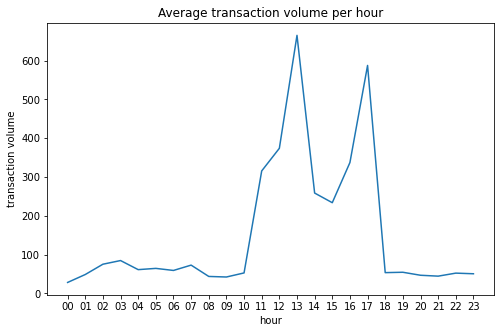

In [58]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(average_hourly_volume.index, average_hourly_volume.amount)
plt.title('Average transaction volume per hour')
plt.xlabel('hour')
plt.ylabel('transaction volume');

### Break down transactions by the type of transactions
- salary
- purchases
- others

In [59]:
df.txn_description.value_counts(dropna = False)

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [60]:
salary_trans = df[df['txn_description'] == 'PAY/SALARY'].sort_values(by = 'hour')
purchase_trans = df[(df['txn_description'] == 'SALES-POS') | (df['txn_description'] == 'POS')].sort_values(by = 'hour')
other_trans = df[(df['txn_description'] == 'INTER BANK') | 
                 (df['txn_description'] == 'PHONE BANK') | 
                 (df['txn_description'] == 'PAYMENT')].sort_values(by = 'hour')

purchase_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7717 entries, 3943 to 12042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             7717 non-null   object        
 1   card_present_flag  7717 non-null   float64       
 2   account            7717 non-null   object        
 3   long_lat           7717 non-null   object        
 4   txn_description    7717 non-null   object        
 5   merchant_id        7717 non-null   object        
 6   first_name         7717 non-null   object        
 7   balance            7717 non-null   float64       
 8   date               7717 non-null   datetime64[ns]
 9   gender             7717 non-null   object        
 10  age                7717 non-null   int64         
 11  merchant_suburb    7717 non-null   object        
 12  merchant_state     7717 non-null   object        
 13  extraction         7717 non-null   object        
 14  amou

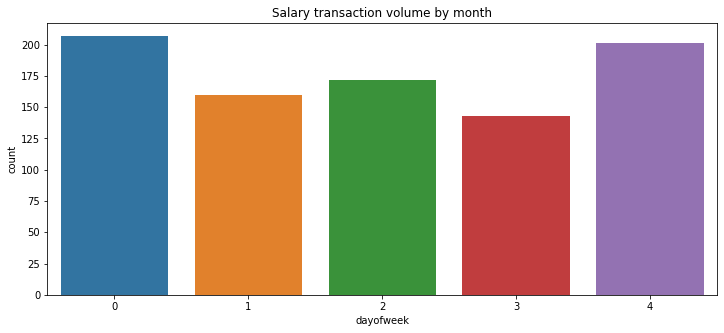

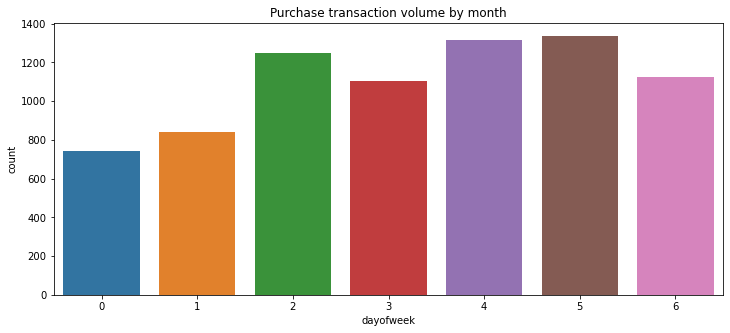

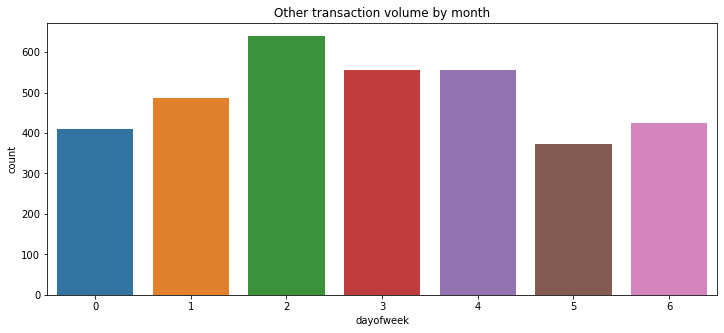

In [61]:
plt.figure(figsize=(12, 5))
sns.countplot(x = 'dayofweek', data = salary_trans)
plt.title('Salary transaction volume by month')

plt.figure(figsize=(12, 5))
sns.countplot(x = 'dayofweek', data = purchase_trans)
plt.title('Purchase transaction volume by month')

plt.figure(figsize=(12, 5))
sns.countplot(x = 'dayofweek', data = other_trans)
plt.title('Other transaction volume by month');

- no salary was paid on Saturday and Sunday.

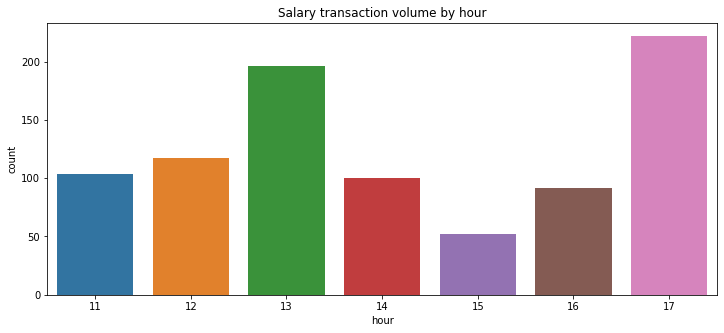

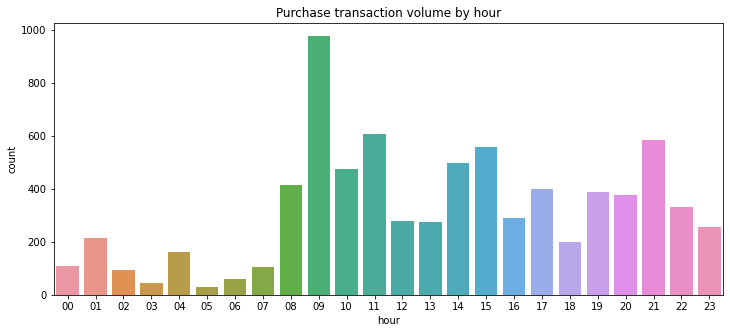

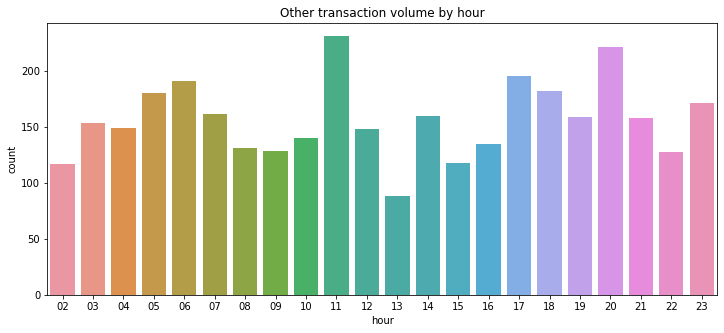

In [62]:
plt.figure(figsize=(12, 5))
sns.countplot(x = 'hour', data = salary_trans)
plt.title('Salary transaction volume by hour')

plt.figure(figsize=(12, 5))
sns.countplot(x = 'hour', data = purchase_trans)
plt.title('Purchase transaction volume by hour')

plt.figure(figsize=(12, 5))
sns.countplot(x = 'hour', data = other_trans)
plt.title('Other transaction volume by hour');

# Save Data

In [63]:
df.to_pickle('/Users/lau_pang/Desktop/Forage/ANZ/data.pkl')